# Final Project Report

* Class: DS 5100
* Student Name: Courtney Hodge
* Student Net ID: yss2zv
* This URL: **UPDATE ME**

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/courtneyhodge/ds5100-finalproject-yss2zv

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python

import numpy as np
import pandas as pd

class Die():
    '''
    General Purpose: A class that creates a die object for the project with distinct faces and
    adjustable weights. 
    '''
    
    def __init__(self, faces, weight = 1.0):                        #W defualts to 1.0
        '''
        Initializes the die with a list of faces. 

        Parameters:
        -----------
        faces : np.ndarray
            A NumPy array of unique faces for the die.
        weight : float, optional
            The initial weight for each face (default is 1.0).

        Raises:
        -------
        TypeError:
            If faces is not a NumPy array or contains invalid types.
        ValueError:
            If faces do not contain unique values.
        '''

        if(not isinstance(faces, np.ndarray)):                      #Throws TypeError if faces is not a NumPy array
            raise TypeError("Faces must be a NumPy array")

        if faces.dtype == object:                                   #checks if string contains objects and type casts as int
            for element in faces:
                try:
                    int(element)
                except:
                    raise TypeError("wrong type: all faces must be strings or numbers") #if this doesn't work, raise TypeError

        elif np.issubdtype(faces.dtype, np.integer):                #check if sub dtypes of faces are ints
            pass

        elif np.issubdtype(faces.dtype, np.floating):               #check if sub dtypes of faces are floats
            pass

        elif np.issubdtype(faces.dtype, np.str_):                   #check if sub dtypes of faces are str
            for element in faces:                                   #if so, try to change them to ints
                try:
                    int(element)
                except:
                    raise TypeError("wrong type: all faces must be strings or numbers") #if there's a TypeError, raise it
            print("String faces are now all ints!")

        else:
            raise TypeError("wrong type: all faces must be strings or numbers") #if none of the above, raise TypeError

        if(len(np.unique(faces)) != len(faces)):                    #check if each value is unique in faces, if not, raise ValueError
            raise ValueError("duplicate values: faces must be distinct")
        else:
            pass

        self.faces = faces

        if((type(weight) == float) or (type(weight) == int) or (type(weight) == str)): #check if the weight is castable to float
            if(type(weight) == str):
                weight = float(weight)
            elif(type(weight) == int):
                weight = float(weight)
        self.weight = np.ones_like(faces, dtype = float) * weight   #initialize weights to 1.0 for each face AND allows for the
                                                                    #weights to update if a float other than 1.0 is provided

        self._private_data_frame = pd.DataFrame({"faces": faces, "weights": weight}) #save faces and weights in a private df


    def update_weight(self, face_value_to_change, new_weight):      #function to update a face weight, ie make it an unfair die
        '''
        Takes two arguments: the face value to be changed and the new weight.

        Parameters:
        -----------
        face_value_to_change : int, float, or str
            The face value whose weight is to be changed.
        new_weight : int, float, or str
            The new weight for the specified face.

        Raises:
        -------
        IndexError:
            If the face value is not found in the die.
        TypeError:
            If the new weight is not a valid type (int, float, or str).
        '''

        if(face_value_to_change in self.faces):                     #if the face value to change is found in the die...
            if((type(new_weight) == float) or (type(new_weight) == int) or (type(new_weight) == str)): #check if the weight is castable to float
                if(type(new_weight) == str):
                    new_weight = float(new_weight)
                elif(type(new_weight) == int):
                    new_weight = float(new_weight)
                self.weight[self.faces == face_value_to_change] = new_weight                            #update the weight of a single face
                self._private_data_frame.loc[self._private_data_frame["faces"] == face_value_to_change, #update the weight of a single face THIS IS SO ESSENTIAL!
                                             "weights"] = new_weight
            else:
                raise TypeError("type error: new weight must be a float, int, or string")               #if the weight is not castable, raise TypeError
        else:
            raise IndexError("index error: face value not in die")  #if the face value to change is NOT found in the die, throw an IndexError


    def roll(self, num_of_rolls = 1):                               #function to roll the die one or more times
        '''
        Takes a parameter of how many times the die is to be rolled;
        defaults to 1. This is essentially a random sample with replacement,
        from the private die data frame, that applies the weights. Returns
        a Python list of outcomes. Does not store internally these results.

        Parameters:
        -----------
        num_of_rolls : int, optional
            The number of times to roll the die (default is 1).

        Returns:
        --------
        list
            A list of outcomes from the rolls.
        '''

        return self._private_data_frame.sample(n = num_of_rolls, replace = True,             #convert the df to a list as specified
                                               weights = self.weight).faces.tolist()


    def die_current_state(self):
        """
        Returns a copy of the private die data frame to the user. 

        Returns:
        --------
        pd.DataFrame
            A copy of the DataFrame containing faces and their current weights.
        """

        return self._private_data_frame.copy()
        
    
    
class Game():
    '''
    General Purpose: A class representing a game played with a list of dice.
    '''
    def __init__(self, dice):
        '''
        Initializes the game with a list of dice. Checks if all objects in
        dice_list are instances of Die. If not, raises a ValueError.

        Parameters:
        -----------
        dice_list : List[Die]
            A list of already instantiated similar dice.

        Raises:
        -------
        ValueError:
            If any object in dice_list is not an instance of Die.
        '''
        if all(isinstance(die, Die) for die in dice):                 #check if all objects in dice_list are instances of Die
            self.dice = dice                                     #if so, set self.dice_list to dice_list
        else:
            raise ValueError("value error: all objects in dice_list must be instances of Die")
            
        
    def play(self, num_rolls):
        '''
        Takes an integer parameter to specify how many times the dice should
        be rolled. Saves the result of the play to a private data frame.
        The data frame should be in wide format, i.e. have the roll number
        as a named index, columns for each die number (using its list index
        as the column name), and the face rolled in that instance in each
        cell.

        Parameters:
        -----------
        num_rolls : int
            The number of times the dice should be rolled.
        '''
        result_dict = {f'Die_{i}': [] for i in range(len(self.dice))} #create a dictionary to store the results in

        for i in range(num_rolls):                                         #roll the dice num_rolls times
            for j, die in enumerate(self.dice):                       #roll each die in the list
                result_dict[f'Die_{j}'].extend(die.roll(1))                #append the result of the roll to the dictionary

        self._private_data_frame_2 = pd.DataFrame(result_dict)             #save the results in a private data frame
        self._private_data_frame_2.index.name = "Roll Number"              #set the index name to "Roll Number"

    def show_results(self, wide_or_narrow = "wide"):
        '''
        This method just returns a copy of the private play data frame to
        the user. Takes a parameter to return the data frame in narrow or wide form
        which defaults to wide form. The narrow form will have a MultiIndex,
        comprising the roll number and the die number (in that order), and a
        single column with the outcomes (i.e. the face rolled).

        Parameters:
        -----------
        wide_or_narrow : str, optional
            Specifies whether to return the data frame in 'wide' or 'narrow' format (default is 'wide').

        Returns:
        --------
        pd.DataFrame
            A copy of the private data frame either in wide or narrow format.

        Raises:
        -------
        ValueError:
            If the user passes an invalid option for wide_or_narrow.
        '''
        if(wide_or_narrow == "wide"):
            return self._private_data_frame_2.copy()

        elif(wide_or_narrow == "narrow"):
            narrow_df = self._private_data_frame_2.stack().reset_index()   #stack the data frame and reset the index
            narrow_df.columns = ["Roll Number", "Die Number", "Outcomes"]  #set the column names


            return narrow_df.set_index(['Roll Number', 'Die Number'])      #set the index to the roll number and die number

        else:
            raise ValueError("value error: use either 'wide' or 'narrow'")
        
    
    
class Analyzer():
    """
    General Purpose: A class for analyzing outcomes from a game.
    """

    def __init__(self, game):
        """
        Initializes the analyzer with a game object. Throws a ValueError if the
        passed value is not a Game object. 

        Parameters:
        -----------
        game : Game
            An instance of the Game class representing the game to analyze.

        Raises:
        -------
        ValueError:
            If game is not an instance of the Game class.
        """
        if not isinstance(game, Game):
            raise ValueError("value error: game must be an instance of Game")
        self.game = game

    def jackpot(self):
        '''
        A jackpot is a result in which all faces are the same, e.g. all ones
        for a six-sided die. Computes how many times the game resulted in a jackpot. 

        Returns:
        --------
        int
            The number of jackpots.
        '''
        df = self.game.show_results()     #grab the current game's df

        jackpot_count = 0
        for _, row in df.iterrows():  #iterate through each row in the df
            if row.nunique() == 1:              #check if nunique is 1 (meaning each die rolls the same number on a given roll)
                jackpot_count += 1

        return jackpot_count

    def face_values(self):
        '''
        Computes how many times a given face is rolled in each event. 

        Returns:
        --------
        pd.DataFrame
            DataFrame showing the count of each face rolled in each event.
            Index represents the roll number, columns represent face values.
        '''
        df = self.game.show_results("wide")

        all_faces = sorted(set(face for die in self.game.dice for face in die.faces)) #get all faces from all dice
        
        face_df = pd.DataFrame(0, index = df.index, columns = all_faces) #create a dataframe to store the results
       
        for roll_number, row in df.iterrows():                           #iterate through each row in the df
            face_counts = row.value_counts()                             #get the count of each face in the row
            for face in all_faces:                                       #iterate through all faces
                face_df.at[roll_number, face] = face_counts.get(face, 0) #store the count of the face in the dataframe
                
        return face_df

    def combination_count(self):
        '''
        Computes the distinct combinations of faces rolled, along with their
        counts. Combinations are order-independent and may contain repetitions. 

        Returns:
        --------
        pd.DataFrame
            DataFrame with MultiIndex of distinct combinations and a column
            for the associated counts.
        '''
        df = self.game.show_results("wide")
        
        sorted_rows = df.apply(lambda x: tuple(sorted(x)), axis=1) #ensure order independency, aligning with method requirements 

        combo_counts = sorted_rows.value_counts().sort_index()     #count the number of times each combination occurs

        combo_df = combo_counts.reset_index(name='Count')          #reset the index to a column

        combo_df.columns = ['Combination', 'Count']                #rename the columns

        combo_df.set_index('Combination', inplace=True)            #set the index to the combination
        
        return combo_df

    def permutation_count(self):
        '''
        Computes the distinct permutations of faces rolled, along with their
        counts. Permutations are order-dependent and may contain repetitions. 

        Returns:
        --------
        pd.DataFrame
            DataFrame with MultiIndex of distinct permutations and a column
            for the associated counts.
        '''
        df = self.game.show_results("wide")

        perm_rows = df.apply(tuple, axis=1)                 #ensure order independency, aligning with method requirements
        
        perm_counts = perm_rows.value_counts().sort_index() #count the number of times each permutation occurs
        
        perm_df = perm_counts.reset_index(name='Count')     #reset the index to a column
        
        perm_df.columns = ['Permutation', 'Count']          #rename the columns
        
        perm_df.set_index('Permutation', inplace=True)      #set the index to the permutation
        
        return perm_df
        
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python

import unittest
import pandas as pd
import numpy as np

from montecarlo import Die, Game, Analyzer

class DieTestSuite(unittest.TestCase):
    #create a die with specified faces and test if it exists
        
    def test_1_create_die(self):
        #make an instance of a six sided die
        faces_array = np.array([1,2,3,4,5,6])
        
        #------start-test-------#
        #innitialize this die, passing a weight of 1.0
        die = Die(faces_array, weight = 1.0)
        flag = True
        
        if(not isinstance(die, Die)): #see if die is of type Die
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = "Die creation failed"

        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_2_update_weight(self):
        #innitialize die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #------start-test-------#
        #update the weights of the die for face "1"
        die.update_weight(1, 7.0)
        flag = True
        
        if(die.weight[0] != 7.0): #see if the weight updated
            flag = False
        #------end-test---------#
        
        #------start-assertion------#        
        #error message in case test fails
        message = 'Die weight did NOT update'
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_3_roll(self):
        #innitialize die
        faces_array = np.array([1,2,3,4,5,6])
        self.die = Die(faces_array, weight = 1.0)
        
        #------start-test-------#
        #roll the die 3 times
        print(self.die.roll(3))
        flag = True
        
        if(len(self.die.roll(3)) != 3): #see if the die rolled 3 times
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Die did NOT roll'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_4_die_curr_state(self):
        #innitialize die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #------start-test-------#
        print(die.die_current_state())
        flag = True
        
        if(not isinstance(die.die_current_state(), pd.DataFrame)): #check if the current die state df exists (shows results)
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Die did NOT roll'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
        
class GameTestSuite(unittest.TestCase):
    
    def test_5_create_game(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #------start-test-------#
        #create an instance of a game
        game = Game(dice)
        flag = True
        
        if(not isinstance(game, Game)):
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Game was NOT created'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_6_play(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #------start-test-------#
        #play the game
        game.play(100)
        flag = True
        
        if(not isinstance(game._private_data_frame_2, pd.DataFrame)):
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Game was NOT played. PLAY THE DAMN GAME! please!'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
    
    def test_7_show_results(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #play the game
        game.play(100)
        
        #------start-test-------#
        #show results
        print(game.show_results())
        flag = True
        
        if(not isinstance(game.show_results(), pd.DataFrame)):
            flag = False
        
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Game results were not shown'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
class AnalyzerTestSuite(unittest.TestCase):
    def test_8_create_game_to_analyze(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 1.0)
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #------start-test-------#
        #create an analyzer instance
        analyzer = Analyzer(game)
        flag = True
        
        if(not isinstance(analyzer, Analyzer)):
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Analyzer instance was NOT created'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_9_jackpot(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 9.0) #adding a heavy weight for jackpots
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #play the game
        game.play(10)
        
        #create an analyzer instance
        analyzer = Analyzer(game)
        
        #------start-test-------#
        print(analyzer.jackpot())
        flag = True
        
        if(not isinstance(analyzer.jackpot(), int)):
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Jackpot is not a returned integer'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_10_face_values(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 9.0) #adding a heavy weight for jackpots
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #play the game
        game.play(10)
        
        #create an analyzer instance
        analyzer = Analyzer(game)
        
        #------start-test-------#
        print(analyzer.face_values())
        flag = True
        
        if(not isinstance(analyzer.face_values(), pd.DataFrame)):
            flag = False
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Face values was NOT returned'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#
        
    def test_10_combination(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 9.0) #adding a heavy weight for jackpots
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #play the game
        game.play(10)
        
        #create an analyzer instance
        analyzer = Analyzer(game)
        
        #------start-test-------#
        print(analyzer.combination_count())
        flag = True
        
        if(not isinstance(analyzer.combination_count(), pd.DataFrame)):
            flag = False
            
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Combination df was NOT retunred'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------#    
        
    def test_11_permutation(self):
        #innitialize a die
        faces_array = np.array([1,2,3,4,5,6])
        die = Die(faces_array, weight = 9.0) #adding a heavy weight for jackpots
        
        #make many of die
        dice = [die for _ in range(7)]
        
        #create an instance of a game
        game = Game(dice)
        
        #play the game
        game.play(10)
        
        #create an analyzer instance
        analyzer = Analyzer(game)
        
        #------start-test-------#
        print(analyzer.permutation_count())
        flag = True
        
        if(not isinstance(analyzer.permutation_count(), pd.DataFrame)):
            flag = False        
        #------end-test---------#
        
        #------start-assertion------#
        #error message in case test fails
        message = 'Permutation df was NOT retunred'
        
        #assertTrue
        self.assertTrue(flag, message)
        #------end-assertion------# 
        
if __name__ == '__main__':
    unittest.main(verbosity=3)
    
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```python

bash-4.4$python3 montecarlo_test.py
Let's play a game!
test_01_create_die (__main__.DieTestSuite.test_01_create_die) ... ok
test_02_update_weight (__main__.DieTestSuite.test_02_update_weight) ... ok
test_03_roll (__main__.DieTestSuite.test_03_roll) ... [2, 3, 6]
ok
test_04_die_curr_state (__main__.DieTestSuite.test_04_die_curr_state) ...    faces  weights
0      1      1.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      1.0
ok
test_05_create_game (__main__.DieTestSuite.test_05_create_game) ... ok
test_06_play (__main__.DieTestSuite.test_06_play) ... ok
test_07_show_results (__main__.DieTestSuite.test_07_show_results) ...              Die_0  Die_1  Die_2  Die_3  Die_4  Die_5  Die_6
Roll Number                                                 
0                5      3      5      1      2      3      2
1                3      4      3      3      6      1      6
2                6      4      1      6      6      3      5
3                4      4      1      5      6      5      1
4                2      6      5      5      4      4      4
...            ...    ...    ...    ...    ...    ...    ...
95               6      1      1      2      3      1      5
96               2      5      1      3      3      1      3
97               3      3      5      2      1      5      4
98               1      5      3      6      1      2      2
99               3      2      1      3      1      3      1

[100 rows x 7 columns]
ok
test_08_create_game_to_analyze (__main__.DieTestSuite.test_08_create_game_to_analyze) ... ok
test_09_jackpot (__main__.DieTestSuite.test_09_jackpot) ... 0
ok
test_10_face_values (__main__.DieTestSuite.test_10_face_values) ...              1  2  3  4  5  6
Roll Number                  
0            2  2  2  1  0  0
1            0  3  1  0  1  2
2            0  2  0  1  2  2
3            1  1  2  0  2  1
4            0  2  1  1  3  0
5            0  2  2  2  1  0
6            1  2  0  0  3  1
7            0  4  1  2  0  0
8            0  1  2  2  1  1
9            0  1  3  0  1  2
ok
test_11_combination (__main__.DieTestSuite.test_11_combination) ...                        Count
Combination                 
(1, 1, 2, 4, 6, 6, 6)      1
(1, 2, 2, 3, 3, 3, 4)      1
(1, 2, 2, 3, 5, 6, 6)      1
(1, 2, 3, 4, 4, 5, 6)      1
(1, 2, 4, 4, 5, 5, 5)      1
(1, 3, 3, 3, 3, 5, 5)      1
(1, 4, 5, 5, 6, 6, 6)      1
(2, 2, 2, 2, 4, 6, 6)      1
(2, 3, 3, 5, 5, 5, 6)      1
(3, 3, 4, 4, 4, 5, 6)      1
ok
test_12_permutation (__main__.DieTestSuite.test_12_permutation) ...                        Count
Permutation                 
(1, 5, 4, 4, 6, 1, 1)      1
(1, 5, 6, 2, 4, 4, 4)      1
(2, 4, 5, 1, 2, 4, 2)      1
(2, 6, 3, 3, 1, 2, 1)      1
(3, 1, 6, 6, 3, 2, 5)      1
(3, 6, 1, 3, 6, 1, 1)      1
(4, 1, 2, 6, 3, 2, 4)      1
(4, 3, 4, 6, 6, 4, 3)      1
(5, 6, 4, 2, 6, 6, 3)      1
(6, 2, 6, 6, 5, 2, 4)      1
ok

----------------------------------------------------------------------
Ran 12 tests in 0.423s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo 
import montecarlo.montecarlo as montecarlo

Let's play a game!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
# help(montecarlo)
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  General Purpose: A class for analyzing outcomes from a game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes the analyzer with a game object. Throws a ValueError if the
     |      passed value is not a Game object.
     |      
     |      Parameters:
     |      -----------
     |      game : Game
     |          An instance of the Game class representing the game to analyze.
     |      
     |      Raises:
     |      -------
     |      ValueError:
     |          If game is not an instance of the Game class.
     |  
     |  combination_count(self)
     |      Computes the distinct combinations of faces rolled, along with their
     |      counts. Combinations are order-independent and may contai

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/courtneyhodge/ds5100-finalproject-yss2zv/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

![](montecarlo_install.png)

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd
import montecarlo.montecarlo as montecarlo
from montecarlo import Die, Analyzer, Game

In [4]:
coin_array = np.array([0, 1])
fair_die = Die(coin_array)
fair_die.die_current_state()

,faces,weights
0,0,1.0
1,1,1.0


In [5]:
unfair_die = Die(coin_array)
unfair_die.update_weight(1, 5.0)
unfair_die.die_current_state()

,faces,weights
0,0,1.0
1,1,5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

> Note here that Die_0 = HEADS and Die_1 = TAILS

In [6]:
fair_game = Game([fair_die, fair_die])
fair_game.play(1000)
fair_game.show_results()

,Die_0,Die_1
Roll Number,,
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
995,0,0
996,1,1
997,0,1


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
dice = [unfair_die, unfair_die, fair_die]
unfair_game = Game(dice)
unfair_game.play(1000)
unfair_game.show_results()

,Die_0,Die_1,Die_2
Roll Number,,,
0,1,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,1,1,0
...,...,...,...
995,1,1,0
996,1,1,0
997,1,0,0


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
analyzer_for_fair_game = Analyzer(fair_game)
analyzer_for_fair_game.jackpot()

504

In [9]:
analyzer_for_unfair_game = Analyzer(unfair_game)
analyzer_for_unfair_game.jackpot()

381

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [16]:
fair_rel_freq = (analyzer_for_fair_game.jackpot()/1000) * 100
fair_rel_freq 

50.4

In [17]:
unfair_rel_freq = (analyzer_for_unfair_game.jackpot()/1000) * 100
unfair_rel_freq

38.1

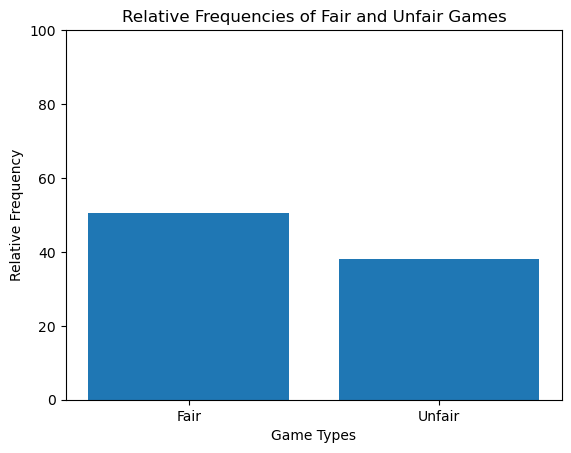

In [25]:
import matplotlib.pyplot as plt

categories = ['Fair', 'Unfair']
frequencies = [fair_rel_freq, unfair_rel_freq]

plt.bar(categories, frequencies)
plt.title('Relative Frequencies of Fair and Unfair Games')
plt.ylim(0,100)
plt.xlabel('Game Types')
plt.ylabel('Relative Frequency');

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).